In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import bike_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible
from training_callback import BatchMSE

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = bike_prep()

In [6]:
layers = 5
neurons = [64, 32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = 32
epochs = 5

Epoch 1/5
462/462 [==============================] - 1s 3ms/step - loss: 28980.8086 - mse: 28980.8086 - val_loss: 12168.9023 - val_mse: 12168.9023
Epoch 2/5
462/462 [==============================] - 1s 2ms/step - loss: 8992.1709 - mse: 8992.1709 - val_loss: 8138.0312 - val_mse: 8138.0312
Epoch 3/5
462/462 [==============================] - 1s 2ms/step - loss: 7141.7832 - mse: 7141.7832 - val_loss: 6515.9771 - val_mse: 6515.9771
Epoch 4/5
462/462 [==============================] - 1s 3ms/step - loss: 5053.6572 - mse: 5053.6572 - val_loss: 3913.1035 - val_mse: 3913.1035
Epoch 5/5
462/462 [==============================] - 1s 2ms/step - loss: 3355.6260 - mse: 3355.6260 - val_loss: 2878.9084 - val_mse: 2878.9084
Overall calculation took 6.615024089813232 seconds.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3456      
___________

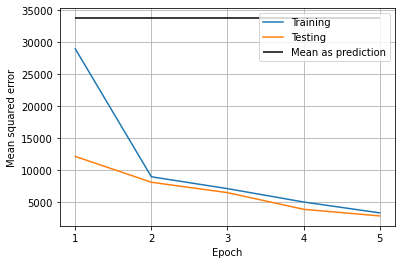

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = mean_squared_error(y_test, np.ones(shape = (len(y_test),))*np.mean(y_test)))
# nn_save(model, "../models/model_test_small.h5")

In [8]:
model.trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(53, 64) dtype=float32, numpy=
 array([[ 0.05143534, -0.4045854 , -0.01846821, ..., -0.3721409 ,
          0.17679702, -0.34159648],
        [-0.05515733, -0.1837456 ,  0.01561086, ..., -0.12853725,
         -0.01063391, -0.01457578],
        [-0.30712095,  0.09863755,  0.15077025, ...,  0.02875328,
         -0.04679327,  1.0909702 ],
        ...,
        [ 0.01216089,  0.01737144,  0.03475042, ..., -0.0538181 ,
          0.3074464 , -0.04380076],
        [ 0.06172702, -0.05654   ,  0.00315132, ..., -0.26797178,
         -0.19252464, -0.42025033],
        [-0.28979626,  0.10165071,  0.17471096, ..., -0.09552792,
         -0.2016004 ,  0.11792462]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.18961655, -0.0630414 ,  0.08469299,  0.0380099 ,  0.02762719,
         0.04275659,  0.02796616, -0.08143203, -0.13258614, -0.01400424,
         0.07119916,  0.05466217,  0.09260835,  0.1786179 ,  0.05540822,
       

In [9]:
model.history.history

{'loss': [28980.80859375,
  8992.1708984375,
  7141.783203125,
  5053.6572265625,
  3355.6259765625],
 'mse': [28980.80859375,
  8992.1708984375,
  7141.783203125,
  5053.6572265625,
  3355.6259765625],
 'val_loss': [12168.90234375,
  8138.03125,
  6515.97705078125,
  3913.103515625,
  2878.908447265625],
 'val_mse': [12168.90234375,
  8138.03125,
  6515.97705078125,
  3913.103515625,
  2878.908447265625]}

In [10]:
model.evaluate(X_test, y_test)

82/82 [==============================] - 0s 842us/step - loss: 2878.9084 - mse: 2878.9084


[2878.908447265625, 2878.908447265625]

In [11]:
weights = model.get_weights()
print(weights)

[array([[ 0.05143534, -0.4045854 , -0.01846821, ..., -0.3721409 ,
         0.17679702, -0.34159648],
       [-0.05515733, -0.1837456 ,  0.01561086, ..., -0.12853725,
        -0.01063391, -0.01457578],
       [-0.30712095,  0.09863755,  0.15077025, ...,  0.02875328,
        -0.04679327,  1.0909702 ],
       ...,
       [ 0.01216089,  0.01737144,  0.03475042, ..., -0.0538181 ,
         0.3074464 , -0.04380076],
       [ 0.06172702, -0.05654   ,  0.00315132, ..., -0.26797178,
        -0.19252464, -0.42025033],
       [-0.28979626,  0.10165071,  0.17471096, ..., -0.09552792,
        -0.2016004 ,  0.11792462]], dtype=float32), array([ 0.18961655, -0.0630414 ,  0.08469299,  0.0380099 ,  0.02762719,
        0.04275659,  0.02796616, -0.08143203, -0.13258614, -0.01400424,
        0.07119916,  0.05466217,  0.09260835,  0.1786179 ,  0.05540822,
        0.10571939, -0.0300308 ,  0.04454207, -0.05285131,  0.04546216,
       -0.15138146, -0.04209494, -0.32157207, -0.06676038, -0.08214185,
        0.

In [12]:
model.predict(X_test)

array([[320.44992 ],
       [108.29714 ],
       [110.7     ],
       ...,
       [ 19.235931],
       [ 63.2396  ],
       [ 12.29    ]], dtype=float32)

In [13]:
y_true, y_pred = nn_mse_pred_true(model, X_test, y_test, print_comp = True)

Prediction: [320.44992], Actual: 254
Prediction: [108.29714], Actual: 114
Prediction: [110.7], Actual: 70
Prediction: [147.22057], Actual: 148
Prediction: [191.53307], Actual: 163
Prediction: [472.91934], Actual: 578
Prediction: [385.07785], Actual: 573
Prediction: [15.200593], Actual: 32
Prediction: [315.93808], Actual: 297
Prediction: [117.90819], Actual: 123
Prediction: [117.19719], Actual: 92
Prediction: [432.10464], Actual: 522
Prediction: [317.38565], Actual: 386
Prediction: [395.7376], Actual: 370
Prediction: [163.1633], Actual: 126
Prediction: [338.5644], Actual: 296
Prediction: [238.58751], Actual: 89
Prediction: [8.300074], Actual: 23
Prediction: [191.66394], Actual: 331
Prediction: [139.07463], Actual: 170
Prediction: [244.78604], Actual: 291
Prediction: [203.35168], Actual: 187
Prediction: [10.306029], Actual: 14
Prediction: [183.94035], Actual: 203
Prediction: [38.492306], Actual: 31
Prediction: [54.639866], Actual: 47
Prediction: [24.517643], Actual: 29
Prediction: [252.9

Prediction: [304.75803], Actual: 128
Prediction: [551.88525], Actual: 409
Prediction: [168.40186], Actual: 174
Prediction: [469.79138], Actual: 433
Prediction: [337.98923], Actual: 404
Prediction: [4.4585733], Actual: 2
Prediction: [374.65308], Actual: 366
Prediction: [6.77459], Actual: 6
Prediction: [88.56328], Actual: 123
Prediction: [275.2821], Actual: 221
Prediction: [13.139913], Actual: 52
Prediction: [347.2744], Actual: 155
Prediction: [8.882864], Actual: 9
Prediction: [437.24536], Actual: 441
Prediction: [155.69566], Actual: 78
Prediction: [63.83539], Actual: 67
Prediction: [520.4706], Actual: 516
Prediction: [159.4884], Actual: 188
Prediction: [9.514046], Actual: 15
Prediction: [257.91922], Actual: 309
Prediction: [286.8625], Actual: 326
Prediction: [280.76474], Actual: 282
Prediction: [516.8336], Actual: 491
Prediction: [188.74402], Actual: 172
Prediction: [195.72299], Actual: 84
Prediction: [199.66551], Actual: 156
Prediction: [123.35101], Actual: 116
Prediction: [234.98593],

Prediction: [311.88], Actual: 390
Prediction: [315.52414], Actual: 328
Prediction: [135.9071], Actual: 48
Prediction: [8.402046], Actual: 1
Prediction: [166.48592], Actual: 47
Prediction: [236.77844], Actual: 288
Prediction: [303.2891], Actual: 114
Prediction: [158.01128], Actual: 106
Prediction: [367.96353], Actual: 371
Prediction: [13.421236], Actual: 10
Prediction: [193.26439], Actual: 154
Prediction: [160.20567], Actual: 128
Prediction: [82.90851], Actual: 86
Prediction: [459.05673], Actual: 432
Prediction: [211.87134], Actual: 177
Prediction: [118.02969], Actual: 177
Prediction: [108.60015], Actual: 119
Prediction: [491.76462], Actual: 522
Prediction: [10.591773], Actual: 12
Prediction: [215.19029], Actual: 201
Prediction: [292.44998], Actual: 276
Prediction: [10.581115], Actual: 24
Prediction: [162.42792], Actual: 115
Prediction: [194.46515], Actual: 70
Prediction: [333.10443], Actual: 399
Prediction: [236.86955], Actual: 196
Prediction: [95.072205], Actual: 12
Prediction: [279.7

In [14]:
true_mse = model.evaluate(X_test, y_test)[1]
print(true_mse)
print(model.predict(X_test[:3]))

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]-1]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_mse = model.evaluate(X_test, y_test)[1]
print(fake_mse)
print(model.predict(X_test[:3]))

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_mse = model.evaluate(X_test, y_test)[1]
print(old_true_mse)
print(model.predict(X_test[:3]))

82/82 [==============================] - 0s 587us/step - loss: 2878.9084 - mse: 2878.9084
2878.908447265625
[[320.44992 ]
 [108.297134]
 [110.69999 ]]
(53, 64)
[array([[-0.94856465, -1.4045854 , -1.0184683 , ..., -1.3721409 ,
        -0.82320297, -1.3415965 ],
       [-1.0551573 , -1.1837456 , -0.9843891 , ..., -1.1285373 ,
        -1.010634  , -1.0145758 ],
       [-1.3071209 , -0.9013624 , -0.84922975, ..., -0.9712467 ,
        -1.0467932 ,  0.09097016],
       ...,
       [-0.9878391 , -0.9826286 , -0.9652496 , ..., -1.0538181 ,
        -0.69255364, -1.0438007 ],
       [-0.93827295, -1.05654   , -0.9968487 , ..., -1.2679718 ,
        -1.1925247 , -1.4202503 ],
       [-1.2897962 , -0.8983493 , -0.825289  , ..., -1.0955279 ,
        -1.2016004 , -0.88207537]], dtype=float32)]
(53, 64)
82/82 [==============================] - 0s 688us/step - loss: 63994.2539 - mse: 63994.2539
63994.25390625
[[14.65277]
 [14.65277]
 [14.65277]]
82/82 [==============================] - 0s 599us/step - 

Epoch 1/2
30/30 [==============================] - 13s 449ms/step - loss: 67967.3516 - mse: 67967.3516 - val_loss: 68986.2969 - val_mse: 68986.2969
Epoch 2/2
10/30 [=========>....................] - ETA: 9s - loss: 67888.8125 - mse: 67888.8125WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.473851). Check your callbacks.


30/30 [==============================] - 15s 500ms/step - loss: 69158.5625 - mse: 69158.5625 - val_loss: 68986.2969 - val_mse: 68986.2969
Overall calculation took 29.677119493484497 seconds.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3456      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,137
Trainable params: 7,137
Non-trainable param

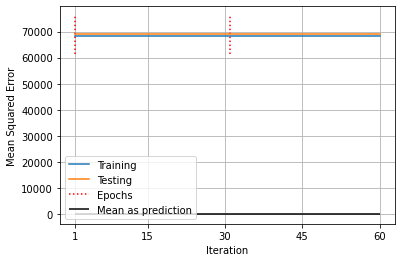

In [15]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
train_mse = BatchMSE((X_train,
                      y_train))
test_mse = BatchMSE((X_test,
                     y_test))
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train,
                     y_train = y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = 500,                            # change to batch_size
                     epochs = 2,                                  # change to epochs
                     callbacks = [train_mse, test_mse]
                     )
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
iteration_list = []
for epoch in range(2):                                             # change to epochs
    for b in range(int(np.ceil(len(X_train) / 500))):              # change 500 to batch_size                        
        iteration_list.append("Epoch: {}, Batch: {}.".format(epoch+1, b+1))
nn_plot_iter_mse(train_mse.mse,
                 test_mse.mse,
                 iteration_list,
                 mse_mean = 1 / len(y_train))

Grauenvolles Ergebnis, das hoffentlich (und wahrscheinlich) hauptsächlich (oder ausschließlich) mit der zu hohen Batch-Size zusammenhängt.